In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LSTM, Flatten, InputLayer, Conv1D, MaxPooling1D, GRU, Convolution2D
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import plot_model,to_categorical
import time

import pandas as pd  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import random as rn
import tensorflow as tf

In [76]:
X = np.load("X_mfcc_heavy-shallow_jpt.npy")
X = X.reshape((X.shape[0], 1, X.shape[1]))
y = np.load("y_mfcc_heavy-shallow_jpt.npy")
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [77]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(2658, 1, 480) (665, 1, 480)
(2658,) (665,)


In [92]:
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(train_x.shape[1],train_x.shape[2]))) 
    model.add(LSTM(256, return_sequences=True))  
    model.add(GRU(256, return_sequences=True))
    model.add(Dense(256, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
              
    # model compilation
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model

In [93]:
checkpoint = ModelCheckpoint("model_lstm_gru_mfcc.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [94]:
start_time = time.time()
model = create_model()
hist = model.fit(train_x, train_y, epochs=100,callbacks=[checkpoint],steps_per_epoch =5, validation_split=0.2)  

time_total = time.time() - start_time

Epoch 1/100
5/5 [==============================] - 3s 153ms/step - loss: 0.5554 - accuracy: 0.7215 - val_loss: 0.4992 - val_accuracy: 0.7838

Epoch 00001: val_accuracy improved from -inf to 0.78383, saving model to model_lstm_gru_mfcc.h5
Epoch 2/100
5/5 [==============================] - 0s 43ms/step - loss: 0.3800 - accuracy: 0.8608 - val_loss: 0.5471 - val_accuracy: 0.7989

Epoch 00002: val_accuracy improved from 0.78383 to 0.79887, saving model to model_lstm_gru_mfcc.h5
Epoch 3/100
5/5 [==============================] - 0s 51ms/step - loss: 0.2998 - accuracy: 0.8951 - val_loss: 0.5793 - val_accuracy: 0.7895

Epoch 00003: val_accuracy did not improve from 0.79887
Epoch 4/100
5/5 [==============================] - 0s 42ms/step - loss: 0.2462 - accuracy: 0.9186 - val_loss: 0.7345 - val_accuracy: 0.7895

Epoch 00004: val_accuracy did not improve from 0.79887
Epoch 5/100
5/5 [==============================] - 0s 47ms/step - loss: 0.2099 - accuracy: 0.9389 - val_loss: 0.5634 - val_accurac


Epoch 00082: val_accuracy did not improve from 0.84586
Epoch 83/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 1.4348 - val_accuracy: 0.8289

Epoch 00083: val_accuracy did not improve from 0.84586
Epoch 84/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 1.4321 - val_accuracy: 0.8289

Epoch 00084: val_accuracy did not improve from 0.84586
Epoch 85/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 1.4327 - val_accuracy: 0.8271

Epoch 00085: val_accuracy did not improve from 0.84586
Epoch 86/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 1.4328 - val_accuracy: 0.8271

Epoch 00086: val_accuracy did not improve from 0.84586
Epoch 87/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0517 - accuracy: 0.9849 - val_loss: 1.4221 - val_accuracy: 0.8308

Epoch 00087: v

Time training: 0 menit 29 detik
Accuracy: 80.00%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


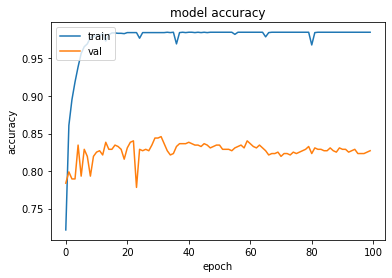

In [95]:
import math
menit = math.floor(time_total/60)
detik = math.floor(time_total - (menit*60))
print("Time training: %s menit %s detik" % (menit, detik))
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

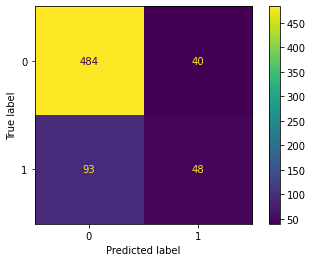

In [97]:
y_pred = model.predict(test_x)
for i in range(0,len(y_pred)) :
    selisih_to_0 = abs(0-y_pred[i][0])
    selisih_to_1 = abs(1-y_pred[i][0])
    if(min(selisih_to_0, selisih_to_1) == selisih_to_0):
        y_pred[i][0] = 0
    else:
        y_pred[i][0] = 1
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [98]:
tp, tn = cm[0, 0], cm[1, 1]
fn, fp = cm[1, 0], cm[0, 1]
    
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
    
uar = (specificity + sensitivity)/2.0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(sensitivity)
print(specificity)
print(uar)
print(accuracy)

0.8388214904679376
0.5454545454545454
0.6921380179612415
0.8
